In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fr-esr-insertion_professionnelle-master (1).csv", delimiter = ";")
df.shape

<ipython-input-5-e78c39ebbd9e>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fr-esr-insertion_professionnelle-master (1).csv", delimiter = ";")


(17669, 33)

In [ ]:
pd.set_option('display.max_columns', None)
df

,annee,diplome,numero_de_l_etablissement,etablissement,etablissementactuel,code_de_l_academie,academie,code_du_domaine,domaine,code_de_la_discipline,discipline,situation,remarque,nombre_de_reponses,taux_de_reponse,poids_de_la_discipline,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,cle_etab,cle_disc,id_paysage
0,2010,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA),A23,Nice,DEG,"Droit, économie et gestion",disc04,Gestion,30 mois après le diplôme,NaN,167.0,88.0,29,88,82,83,96,2000,31200,29,11.7,1750,nd,nd,nd,NaN,NaN,Nice - Sophia-Antipolis_30,disc04_30,7CYWd
1,2010,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA),A23,Nice,SHS,Sciences humaines et sociales,disc08,Histoire-géographie,30 mois après le diplôme,NaN,9.0,75.0,2,ns,ns,ns,ns,ns,ns,29,11.7,1750,nd,nd,nd,NaN,NaN,Nice - Sophia-Antipolis_30,disc08_30,7CYWd
2,2010,MASTER LMD,0134009M,Aix-Marseille,NaN,A02,Aix-Marseille,SHS,Sciences humaines et sociales,disc08,Histoire-géographie,30 mois après le diplôme,NaN,40.0,77.0,3,80,75,65,90,ns,ns,29,11.7,1750,nd,nd,nd,NaN,NaN,Aix-Marseille_30,disc08_30,xJdyB
3,2010,MASTER LMD,0134009M,Aix-Marseille,NaN,A02,Aix-Marseille,SHS,Sciences humaines et sociales,disc10,Information communication,30 mois après le diplôme,NaN,66.0,76.0,4,89,78,64,90,1750,27300,29,11.7,1750,nd,nd,nd,NaN,NaN,Aix-Marseille_30,disc10_30,xJdyB
4,2010,MASTER LMD,0141408E,Caen Normandie,NaN,A70,Normandie,DEG,"Droit, économie et gestion",disc01,"Ensemble formations juridiques, économiques et...",30 mois après le diplôme,NaN,255.0,76.0,55,93,92,85,98,2110,32900,26,9.7,1680,nd,nd,nd,NaN,NaN,Caen Normandie_30,disc01_30,p25Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17664,2019,MASTER ENS,UNIV,Toutes universités et établissements assimilés,NaN,NaN,NaN,MEEF,Masters enseignement,disc18,Masters enseignement,18 mois après le diplôme,NaN,5912.0,64.0,100.0,98,91,82,91,1750,27300,21,7.2,1980,81,26,76,1480,2480,Toutes universités et établissements assimilés_18,disc18_18,NaN
17665,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,NaN,NaN,DEG,"Droit, économie et gestion",disc03,Économie,18 mois après le diplôme,NaN,2295.0,69.0,7.0,85,85,73,96,2090,32600,31,7.2,1980,57,44,56,1480,2480,Toutes universités et établissements assimilés_18,disc03_18,NaN
17666,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,NaN,NaN,SHS,Sciences humaines et sociales,disc10,Information communication,18 mois après le diplôme,NaN,1326.0,68.0,4.0,83,81,53,89,1700,26500,31,7.2,1980,55,38,75,1480,2480,Toutes universités et établissements assimilés_18,disc10_18,NaN
17667,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,NaN,NaN,STS,"Sciences, technologies et santé",disc12,"Ensemble sciences, technologies et santé",30 mois après le diplôme,NaN,8814.0,74.0,27.0,93,94,81,97,2170,33900,31,7.2,1980,73,44,39,1480,2480,Toutes universités et établissements assimilés_30,disc12_30,NaN


## ETAPE 1 : DATACLEANING

### Beaucoup de colonnes ont des observations où il est marqué "ns" (non significatives : moins de 30 répondants) ou "nd" (non disponibles). L'idée est de nettoyer un maximum de ces valeurs.

In [ ]:
df = df.replace('ns', np.nan)
df= df.replace('nd', np.nan)

### On suppripme les colonnes contenant trop de valeurs NaN, car le nombre d'observations n'est pas suffisant pour faire des analyses dessus.

In [ ]:
print('\n\n', (df.isna().mean()*100).sort_values(ascending=False))



 remarque                                         92.127455
etablissementactuel                              81.476031
salaire_brut_annuel_estime                       57.213198
salaire_net_median_des_emplois_a_temps_plein     57.213198
emplois_cadre                                    52.708133
emplois_exterieurs_a_la_region_de_luniversite    51.745996
emplois_cadre_ou_professions_intermediaires      50.019809
emplois_a_temps_plein                            49.861339
emplois_stables                                  49.476484
femmes                                           47.467316
taux_dinsertion                                  44.620522
salaire_net_mensuel_regional_3eme_quartile       14.132096
salaire_net_mensuel_regional_1er_quartile        14.132096
poids_de_la_discipline                            4.227744
salaire_net_mensuel_median_regional               2.671345
taux_de_chomage_regional                          2.286490
id_paysage                                        1.8

### Tous les codes et clés sont redondants. On les enlève aussi.

In [ ]:
df = df.drop('remarque', axis=1)
df = df.drop('etablissementactuel', axis=1)
df = df.drop('code_de_l_academie', axis=1)
df = df.drop('code_de_la_discipline', axis=1)
df = df.drop('cle_etab', axis=1)
df = df.drop('cle_disc', axis=1)

In [ ]:
df.shape

(17669, 27)

### Beaucoup de colonnes ne sont pas encodées avec une valeur numérique, ce qui nous empêche de faire les visualisations. Changeons cela.

In [ ]:
print(df.dtypes)

annee                                              int64
diplome                                           object
numero_de_l_etablissement                         object
etablissement                                     object
academie                                          object
code_du_domaine                                   object
domaine                                           object
discipline                                        object
situation                                         object
nombre_de_reponses                               float64
taux_de_reponse                                  float64
poids_de_la_discipline                            object
taux_dinsertion                                   object
emplois_cadre_ou_professions_intermediaires       object
emplois_stables                                   object
emplois_a_temps_plein                             object
salaire_net_median_des_emplois_a_temps_plein      object
salaire_brut_annuel_estime     

In [ ]:
for col in ['taux_dinsertion', 'emplois_cadre_ou_professions_intermediaires', 'emplois_stables', 'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein', 'salaire_brut_annuel_estime', 'de_diplomes_boursiers', 'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional', 'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite', 'femmes', 'salaire_net_mensuel_regional_1er_quartile', 'salaire_net_mensuel_regional_3eme_quartile']:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [ ]:
print(df.dtypes)

annee                                              int64
diplome                                           object
numero_de_l_etablissement                         object
etablissement                                     object
academie                                          object
code_du_domaine                                   object
domaine                                           object
discipline                                        object
situation                                         object
nombre_de_reponses                               float64
taux_de_reponse                                  float64
poids_de_la_discipline                            object
taux_dinsertion                                  float64
emplois_cadre_ou_professions_intermediaires      float64
emplois_stables                                  float64
emplois_a_temps_plein                            float64
salaire_net_median_des_emplois_a_temps_plein     float64
salaire_brut_annuel_estime     

### On supprime les observations qui contiennent trop peu de valeurs. Si une observation contient 5 NaN ou +, on la supprime.

In [ ]:
df.dropna(axis=0, thresh=df.shape[1] - 4, inplace=True)
df.shape

(8390, 27)

### On aimerait faire des visualisations par années, mais nous avons peur d'avoir trop peu d'observations dans certaines années. Regardons la part de chaque année dans le dataframe.

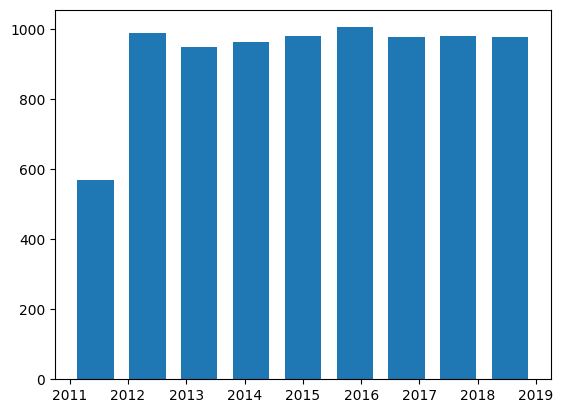

In [ ]:
plt.hist( df['annee'], bins = 9, rwidth=0.7)
plt.show()

### Il y a environ le même nombre d'observations sur toutes les années appart 2011. Enlevons cette année.

In [ ]:
df = df.loc[df['annee'] != 2011]
df.shape

(7822, 27)

### Regardons une fois de plus la répartition des NaN par colonne pour voir si notre dataset fait du sens.

In [ ]:
print('\n\n', (df.isna().mean()*100).sort_values(ascending=False))



 salaire_brut_annuel_estime                       14.702122
salaire_net_median_des_emplois_a_temps_plein     14.702122
id_paysage                                        3.681923
academie                                          3.681923
emplois_exterieurs_a_la_region_de_luniversite     1.316799
de_diplomes_boursiers                             0.997187
salaire_net_mensuel_median_regional               0.818205
emplois_a_temps_plein                             0.767067
emplois_cadre                                     0.690361
emplois_cadre_ou_professions_intermediaires       0.690361
salaire_net_mensuel_regional_1er_quartile         0.626438
salaire_net_mensuel_regional_3eme_quartile        0.600869
taux_de_chomage_regional                          0.345180
emplois_stables                                   0.230120
femmes                                            0.089491
taux_de_reponse                                   0.000000
numero_de_l_etablissement                         0.0

### C'est magnifique. Regardons une dernière fois le dataframe avant de l'exporter.

In [ ]:
df

,annee,diplome,numero_de_l_etablissement,etablissement,academie,code_du_domaine,domaine,discipline,situation,nombre_de_reponses,taux_de_reponse,poids_de_la_discipline,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,id_paysage
406,2012,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Nice,SHS,Sciences humaines et sociales,Ensemble sciences humaines et sociales,18 mois après le diplôme,74.0,62.0,14,79.0,78.0,36.0,70.0,1450.0,22600.0,29.0,11.7,1790.0,60.0,37.0,77.0,1390.0,2170.0,7CYWd
407,2012,MASTER LMD,0060931E,Nice - Sophia-Antipolis,Nice,STS,"Sciences, technologies et santé","Ensemble sciences, technologies et santé",18 mois après le diplôme,183.0,69.0,32,84.0,93.0,77.0,96.0,2000.0,31200.0,29.0,11.7,1790.0,74.0,39.0,40.0,1390.0,2170.0,7CYWd
410,2012,MASTER ENS,0134009M,Aix-Marseille,Aix-Marseille,MEEF,Masters enseignement,Masters enseignement,30 mois après le diplôme,179.0,79.0,100,94.0,89.0,84.0,89.0,1750.0,27300.0,34.0,11.7,1790.0,77.0,37.0,83.0,1390.0,2170.0,xJdyB
411,2012,MASTER LMD,0134009M,Aix-Marseille,Aix-Marseille,SHS,Sciences humaines et sociales,Ensemble sciences humaines et sociales,30 mois après le diplôme,256.0,74.0,18,81.0,79.0,50.0,80.0,1590.0,24800.0,29.0,11.7,1790.0,47.0,43.0,66.0,1390.0,2170.0,xJdyB
412,2012,MASTER LMD,0134009M,Aix-Marseille,Aix-Marseille,STS,"Sciences, technologies et santé",Sciences de la vie et de la terre,30 mois après le diplôme,129.0,74.0,9,80.0,87.0,59.0,93.0,1730.0,27000.0,29.0,11.7,1790.0,56.0,49.0,55.0,1390.0,2170.0,xJdyB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17664,2019,MASTER ENS,UNIV,Toutes universités et établissements assimilés,NaN,MEEF,Masters enseignement,Masters enseignement,18 mois après le diplôme,5912.0,64.0,100.0,98.0,91.0,82.0,91.0,1750.0,27300.0,21.0,7.2,1980.0,81.0,26.0,76.0,1480.0,2480.0,NaN
17665,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,DEG,"Droit, économie et gestion",Économie,18 mois après le diplôme,2295.0,69.0,7.0,85.0,85.0,73.0,96.0,2090.0,32600.0,31.0,7.2,1980.0,57.0,44.0,56.0,1480.0,2480.0,NaN
17666,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,SHS,Sciences humaines et sociales,Information communication,18 mois après le diplôme,1326.0,68.0,4.0,83.0,81.0,53.0,89.0,1700.0,26500.0,31.0,7.2,1980.0,55.0,38.0,75.0,1480.0,2480.0,NaN
17667,2019,MASTER LMD,UNIV,Toutes universités et établissements assimilés,NaN,STS,"Sciences, technologies et santé","Ensemble sciences, technologies et santé",30 mois après le diplôme,8814.0,74.0,27.0,93.0,94.0,81.0,97.0,2170.0,33900.0,31.0,7.2,1980.0,73.0,44.0,39.0,1480.0,2480.0,NaN


In [ ]:
df.to_csv('data_cleaned_insertion_pro.csv')